# Buffon-Laplace Experiment Simulated in Python

## einfache implementierung

In [1]:
import random, pylab, statistics, numpy, math

In [2]:


def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(numNeedles))

def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)



In [3]:

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/1.96:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

random.seed(0)
estPi(0.005, 10)

Est. = 3.1352, Std. dev. = 0.031435, Needles = 1000
Est. = 3.1568000000000005, Std. dev. = 0.035589, Needles = 2000
Est. = 3.1414, Std. dev. = 0.024731, Needles = 4000
Est. = 3.14545, Std. dev. = 0.014489, Needles = 8000
Est. = 3.137425, Std. dev. = 0.013757, Needles = 16000
Est. = 3.142025, Std. dev. = 0.006106, Needles = 32000
Est. = 3.1431062499999998, Std. dev. = 0.005058, Needles = 64000
Est. = 3.1408187499999998, Std. dev. = 0.004557, Needles = 128000
Est. = 3.141640625, Std. dev. = 0.003266, Needles = 256000
Est. = 3.1409320312499998, Std. dev. = 0.002122, Needles = 512000


3.1409320312499998

## integration Test

In [4]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
pylab.rcParams['lines.markersize'] = 10
#set number of times marker is shown when displaying legend
pylab.rcParams['legend.numpoints'] = 1

In [5]:
def integrate(f, a, b, step):
    yVals, xVals = [], []
    xVal = a
    while xVal <= b:
        xVals.append(xVal)
        yVals.append(f(xVal))
        xVal += step
    pylab.plot(xVals, yVals)
    pylab.title('sin(x)')
    pylab.xlim(a, b)
    xUnders, yUnders, xOvers, yOvers = [],[],[],[]
    for i in range(500):
        xVal = random.uniform(a, b)
        yVal = random.uniform(0, 1)
        if yVal < f(xVal):
            xUnders.append(xVal)
            yUnders.append(yVal)
        else:
            xOvers.append(xVal)
            yOvers.append(yVal)
    pylab.plot(xUnders, yUnders, 'ro')
    pylab.plot(xOvers, yOvers, 'ko')
    pylab.xlim(a, b)
    ratio = len(xUnders)/(len(xUnders) + len(yUnders))
    print(ratio)
    print(ratio*b)
    
def one(x):
    return 0.9
    


0.5
1.5707963267948966


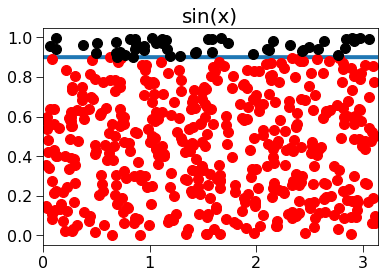

In [6]:
integrate(one, 0, math.pi, 0.001)